In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATASET

In [ ]:
df = pd.read_csv("/content/abalone.csv")

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.shape

(4177, 9)

## RINGS = +1.5 GIVES THE AGE IN YEAR

In [ ]:
df['Age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


##VISUALIZATION

## UNI-VARIATE ANALYSIS

In [ ]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


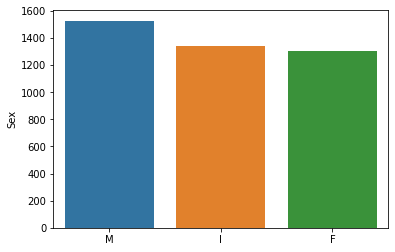

In [ ]:
sns.barplot (df.Sex.value_counts().index , df.Sex.value_counts())

([<matplotlib.patches.Wedge at 0x7faa9b015790>,
 [Text(0.5319415728578049, 1.186186394739699, 'M'),
  Text(-1.0848393519507589, -0.18199884741134378, 'I'),
  Text(0.6099659291018239, -0.9153914820091724, 'F')],
 [Text(0.32734866022018755, 0.7299608583013532, '36.6%'),
  Text(-0.5917305556095048, -0.09927209858800569, '32.1%'),
  Text(0.3327086886009948, -0.49930444473227575, '31.3%')])

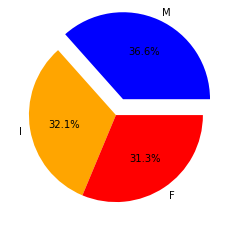

In [ ]:
plt.pie(df.Sex.value_counts(),[0.2,0,0],labels=['M','I','F'],autopct="%1.1f%%",colors=['blue','orange','red'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


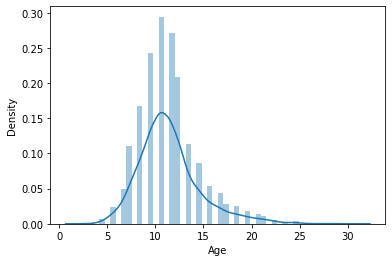

In [ ]:
sns.distplot(df.Age)

## BI-VARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


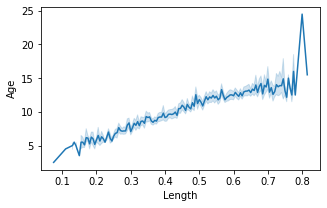

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(df.Length,df.Age)

## MULTI-VARIATE ANALYSIS

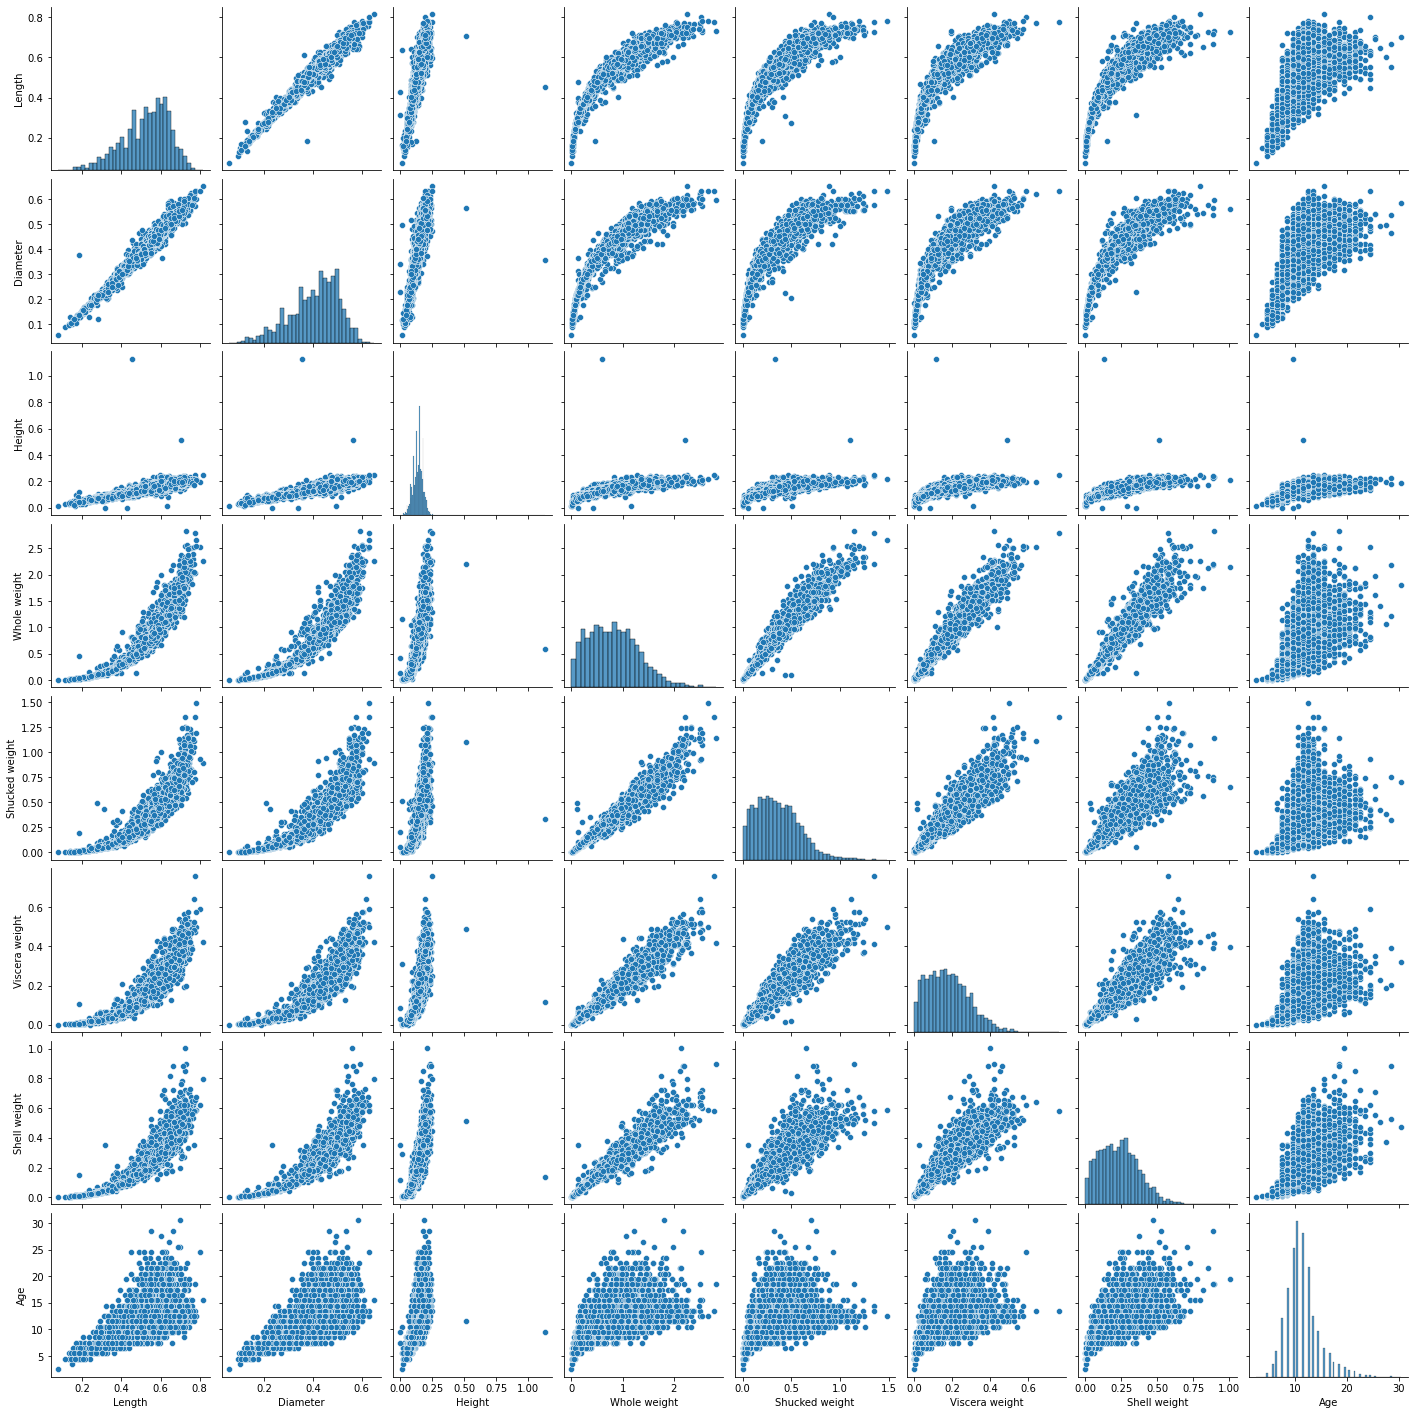

In [ ]:
sns.pairplot(df)

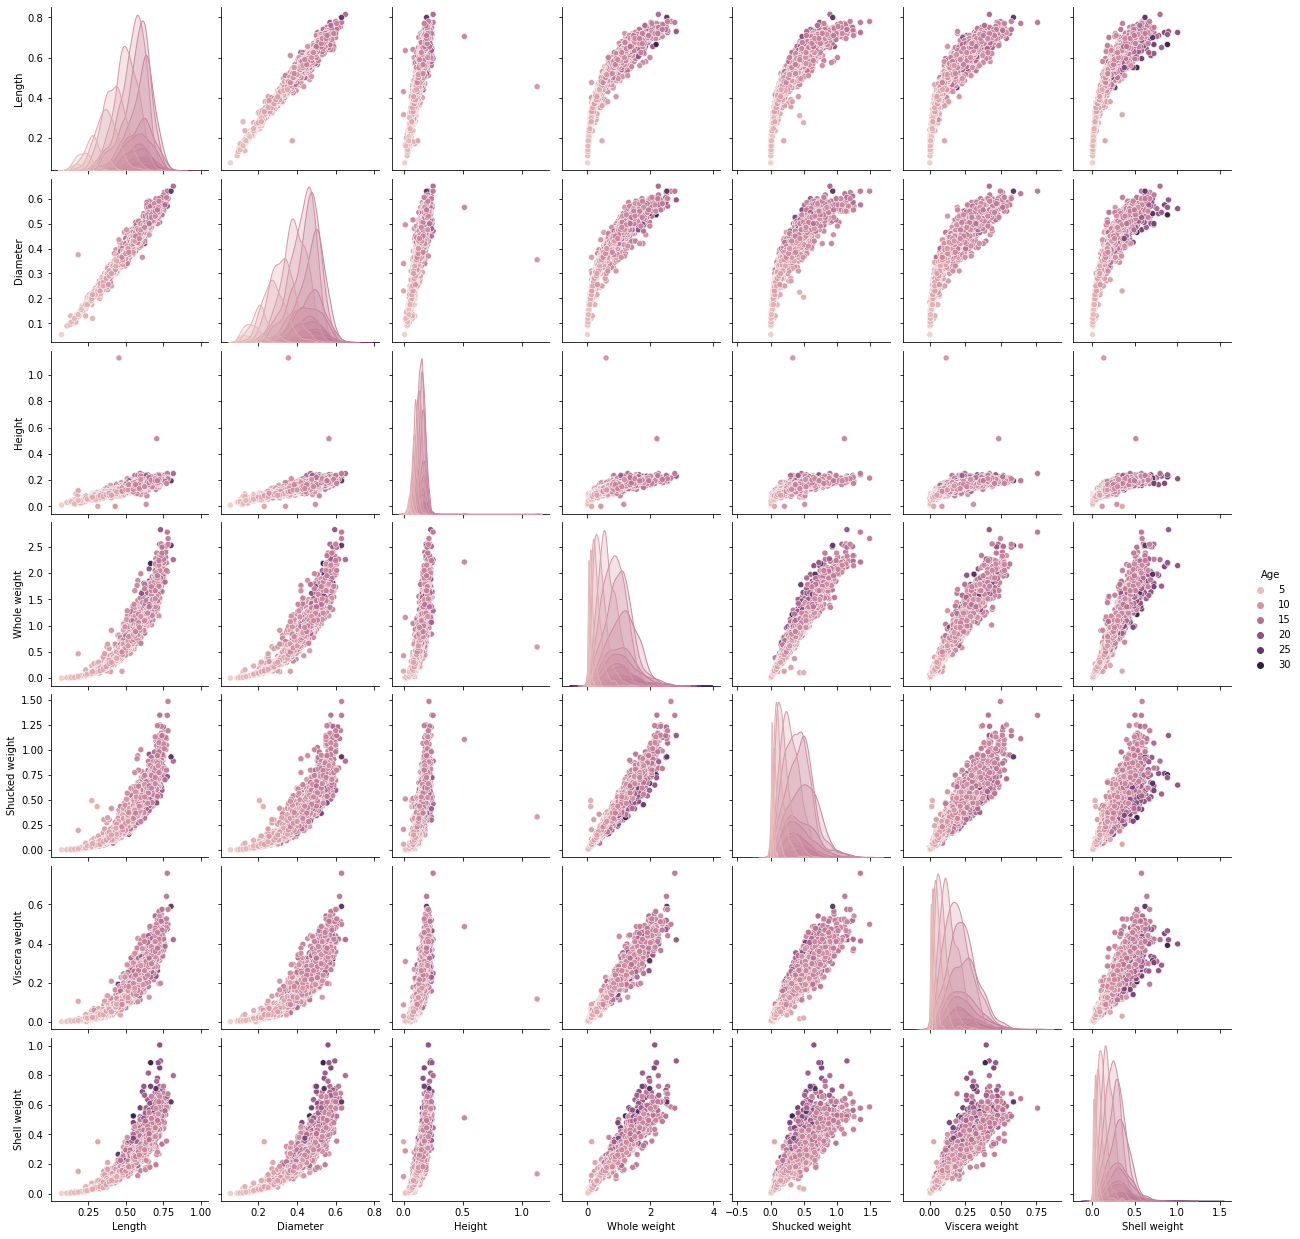

In [ ]:
sns.pairplot(df,hue='Age',kind='scatter',diag_kind='kde')

## CHECKING MISSING VALUES

In [ ]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

## DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


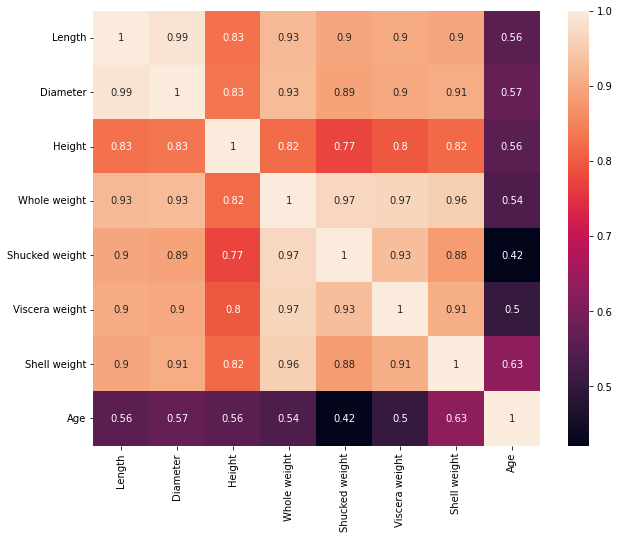

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## REMOVING OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


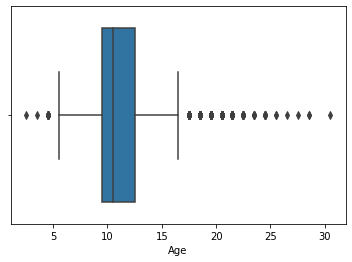

In [ ]:
""" Heatmap we can clearly see that Height,Length and Diameter are Hightly correlated.
And Weights are also Highly Correlated"""
sns.boxplot(df.Age)

In [ ]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [ ]:
IQR = q3-q1

In [ ]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
df=df[df.Age<upper_limit]
df=df[df.Age>lower_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


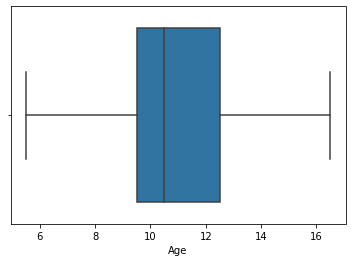

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


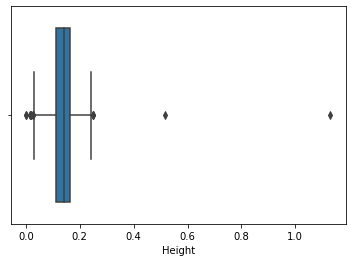

In [ ]:
sns.boxplot(df.Height)

In [ ]:
df.drop(df[df['Height'] > 0.3].index,inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


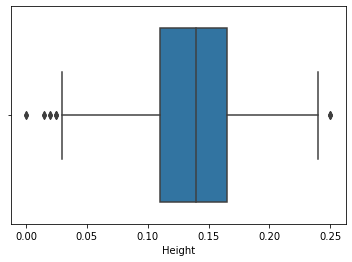

In [ ]:
sns.boxplot(df.Height)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3897 non-null   object 
 1   Length          3897 non-null   float64
 2   Diameter        3897 non-null   float64
 3   Height          3897 non-null   float64
 4   Whole weight    3897 non-null   float64
 5   Shucked weight  3897 non-null   float64
 6   Viscera weight  3897 non-null   float64
 7   Shell weight    3897 non-null   float64
 8   Age             3897 non-null   float64
dtypes: float64(8), object(1)
memory usage: 304.5+ KB


##SPLITTING THE DATASET INTO X= INDEPENDENT VARIABLES AND Y = DEPENDENT VARIABLES

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [ ]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 3897, dtype: float64

## PERFORM ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
x.Sex=le.fit_transform(x.Sex)

In [ ]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

## SCALING

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.158049,-0.550836,-0.403988,-1.127162,-0.607893,-0.585513,-0.697576,-0.604357
1,1.158049,-1.433073,-1.422978,-1.260289,-1.206805,-1.146552,-1.180279,-1.213749
2,-1.299966,0.079333,0.156457,-0.062140,-0.269513,-0.441887,-0.325205,-0.147313
3,1.158049,-0.676870,-0.403988,-0.328395,-0.603741,-0.625908,-0.578049,-0.566270
4,-0.070959,-1.601119,-1.524877,-1.526545,-1.249362,-1.191435,-1.263028,-1.328010


## SPLIT THE DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## MODEL BUILDING

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
r=Ridge()
l=Lasso()

In [ ]:
r.fit(x_train,y_train)

Ridge()

In [ ]:
l.fit(x_train,y_train)

Lasso()

In [ ]:
pred1=r.predict(x_test)
pred1

array([ 7.62095815, 13.6991795 , 13.52090944, 12.10161675, 11.52414664,
        9.12416354,  7.67281632, 11.13873265, 11.23038501, 11.53539509,
       11.3020951 , 11.27676082,  9.11234989,  9.16988238, 11.57931224,
       10.06118229, 12.40139307,  9.80103755, 11.45901261, 10.08207461,
        9.2444399 ,  7.01165708, 10.68982815, 12.10678188, 11.37789094,
       13.82314485, 10.09251407, 10.77320212, 10.79193823, 12.04558047,
       11.37574111, 14.1827811 , 11.44854288, 10.83817816, 10.97010616,
       10.1691417 ,  8.58204762, 16.70906801, 11.85809568, 11.34894836,
       11.99820525, 11.18534606, 14.64860352, 12.0774308 ,  8.94676791,
       12.30387116, 10.30351425, 12.22429052,  8.00080603,  8.79675756,
       11.10113881,  6.80546126,  9.95294862, 12.652567  ,  9.22283812,
        9.21949231, 12.1524762 , 13.36778373, 10.1596581 ,  8.74618653,
       10.46430886, 12.42062537, 10.99746217,  9.54630863,  9.42644004,
       11.90962524, 13.71253589,  9.2202777 , 10.76758536, 11.07

In [ ]:
pred1_train=r.predict(x_train)
pred1_train

array([11.07863231,  8.96319546, 11.11949344, ..., 11.43963093,
       11.20999716,  8.69401956])

In [ ]:
pred2=l.predict(x_test)
pred2

array([10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88090349,
       10.88090349, 10.88090349, 10.88090349, 10.88090349, 10.88

In [ ]:
pred2_train=l.predict(x_train)
pred2_train

array([10.88090349, 10.88090349, 10.88090349, ..., 10.88090349,
       10.88090349, 10.88090349])

In [ ]:
res_val=pd.DataFrame({'Actual':y_test,'ridge_pred':pred1,'lasso_pred':pred2})
res_val.head(10)

,Actual,ridge_pred,lasso_pred
3964,6.5,7.620958,10.880903
1051,12.5,13.699180,10.880903
379,13.5,13.520909,10.880903
2268,14.5,12.101617,10.880903
1622,10.5,11.524147,10.880903
436,8.5,9.124164,10.880903
2037,6.5,7.672816,10.880903
1645,11.5,11.138733,10.880903
2839,11.5,11.230385,10.880903
3220,12.5,11.535395,10.880903


## EVALUATION METRICS FOR REGRESSION PROBLEM

In [ ]:
from sklearn import metrics

In [ ]:
# R-Square
print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))

-0.42947986428279084
-0.0002503667270010723


In [ ]:
#Training accuracy for both model

print(metrics.r2_score(y_train,pred1_train))
print(metrics.r2_score(y_train,pred2_train))

-0.4425612297108237
-0.00011763226760397316


In [ ]:
## MSE(Mean square error)

print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

8.499804187749415
5.947570489332988


In [ ]:
## RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

2.915442365705317
2.438764131549623
